### Use gradient descent to find local minima
Consider loss function L(w) with one parameter w:
$$w^{*} = arg\,\min_{w}L(w)$$
1. (randomly) pick an intial value $w^{0}$
2. compute $\left.\frac{dL}{dw}\right|_{w=w^{0}}$
$$w^{1} = w^{0} - \eta\left.\frac{dL}{dw}\right|_{w=w^{0}}$$
3. compute $\left.\frac{dL}{dw}\right|_{w=w^{1}}$
$$w^{2} = w^{1} - \eta\left.\frac{dL}{dw}\right|_{w=w^{1}}$$

gradient: $\nabla L = \left[\frac{\frac{\partial L}{\partial w}}{\frac{\partial L}{\partial b}}\right]$

Loss function of linear regression is convex.
$$L(w,b)=\sum_{n=1}^N (\hat y^{n}-(b+w\cdot x_{cp}^{n})^{2}$$
$$w^{*},b^{*} = arg\,\min_{w,b}L(w,b)$$
$$\frac{\partial L}{\partial w}=\sum_{n=1}^N 2(\hat y^{n}-(b+w\cdot x_{cp}^{n})(-x_{cp}^{n})$$
$$\frac{\partial L}{\partial b}=\sum_{n=1}^N 2(\hat y^{n}-(b+w\cdot x_{cp}^{n})$$

In [35]:
import numpy as np
x_data = [338.,333.,328.,207.,226.,25.,179.,60.,208.,606.]
y_data = [640.,633.,619.,393.,428.,27.,193.,66.,226.,1591.]
print(x_data)
print(y_data)

[338.0, 333.0, 328.0, 207.0, 226.0, 25.0, 179.0, 60.0, 208.0, 606.0]
[640.0, 633.0, 619.0, 393.0, 428.0, 27.0, 193.0, 66.0, 226.0, 1591.0]


In [49]:
x=np.arange(-200,-100,1)#bias
y=np.arange(-5,5,0.1)#weight
Z=np.zeros((len(x),len(y)))
X,Y=np.meshgrid(x,y)
for i in range(len(x)):
    for j in range(len(y)):
        b=x[i]
        w=y[j]
        Z[j][i]=0
        for n in range(len(x_data)):
            Z[j][i]=Z[j][i] + (y_data[n]-b-w*x_data[n])**2
        Z[j][i]=Z[j][i]/len(x_data)

In [47]:
b=-120
w=-4
lr=1 #learning rate
iteration=200000

b_history=[b]
w_history=[w]

lr_b=0
lr_w=0

for i in range(iteration):
    b_grad = 0.0
    w_grad = 0.0
    for n in range(len(x_data)):
        b_grad = b_grad - 2.0 * (y_data[n] - b - w*x_data[n])*1.0
        w_grad = w_grad - 2.0 * (y_data[n] - b - w*x_data[n])*x_data[n]
        
        lr_b = lr_b + b_grad **2
        lr_w = lr_w + w_grad **2
    #update parameters
    b=b-lr/np.sqrt(lr_b)*b_grad
    w=w-lr/np.sqrt(lr_w)*w_grad
    
    b_history.append(b)
    w_history.append(w)


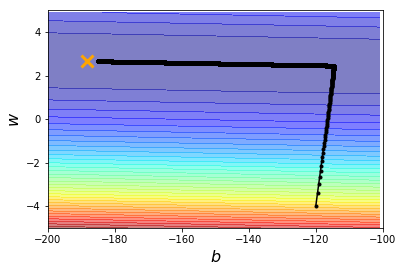

In [48]:
import matplotlib.pyplot as plt
plt.contourf(x,y,Z,50,alpha=0.5,cmap=plt.get_cmap('jet'))
plt.plot([-188.4],[2.67],'x',ms=12,markeredgewidth=3,color='orange')
plt.plot(b_history,w_history,'o-',ms=3,lw=1.5,color='black')
plt.xlim(-200,-100)
plt.ylim(-5,5)
plt.xlabel(r'$b$',fontsize=16)
plt.ylabel(r'$w$',fontsize=16)
plt.show()